# Trying Out DePlot

- I was interested in trying the DePlot after reading [this discussion](https://www.kaggle.com/competitions/benetech-making-graphs-accessible/discussion/400250) and decided to give it a try with some training data.
- I'm not quite sure about the output format, so the parsing (display_deplot_output method) might be incorrect.
- I'm using the same samples as in [this notebook](https://www.kaggle.com/code/leonidkulyk/eda-mga-graphs-with-interactive-annotations).


In [1]:
#It looks like I need to install the latest transformers to use Pix2StructForConditionalGeneration.
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-p7k045yr
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-p7k045yr
  Resolved https://github.com/huggingface/transformers to commit 656e869a4523f6a0ce90b3aacbb05cc8fb5794bb
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for transformers: filename=transformers-4.28.0.dev0-py3-none-any.whl size=6895940 sha256=0d2c938f2e7a2e2d33cdb2a32ed7d990b7e5648e6fc383de82a389fba465e343
  Stored in directory: /tmp/pip-ephem-wheel-cache-li6q1dql/wheels/35/2e/a7/d819e3310040329f0f47e57c9e3e7a7338aa5e74c49acfe522
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [2]:
import pandas as pd
import io
import torch
from transformers import Pix2StructForConditionalGeneration, Pix2StructProcessor
import requests
from PIL import Image
import re

In [3]:
def display_deplot_output(deplot_output):
    '''
    The raw output of deplot
    TITLE | Rural population (%) long-run with 2050 projections<0x0A>(OWID) in Greece<0x0A>Years | Rural population<0x0A>1940 | 47.38<0x0A>1960 | 43.68<0x0A>1980 | 30.28<0x0A>...
    '''
    
    deplot_output = deplot_output.replace("<0x0A>", "\n").replace(" | ", "\t")

    second_a_index = [m.start() for m in re.finditer('\t', deplot_output)][1]
    last_newline_index = deplot_output.rfind('\n', 0, second_a_index) 

    title = deplot_output[:last_newline_index]
    table = deplot_output[last_newline_index+1:]

    print(title)

    data = io.StringIO(table)
    df = pd.read_csv(data, sep='\t')
    display(df)
    

def deplot(path, model, processor, device):

    image = Image.open(path)
    display(image)
    inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")

    # Move inputs to GPU
    inputs = {key: value.to(device) for key, value in inputs.items()}

    predictions = model.generate(**inputs, max_new_tokens=512)
    return processor.decode(predictions[0], skip_special_tokens=True)



In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Pix2StructForConditionalGeneration.from_pretrained('google/deplot').to(device)
processor = Pix2StructProcessor.from_pretrained('google/deplot')

# Vertical Bar -> Excellent 

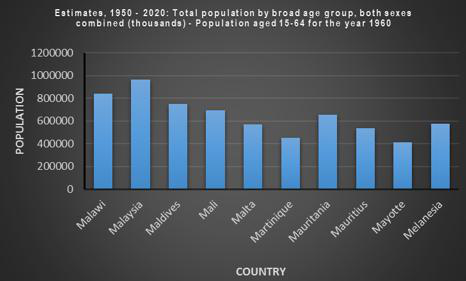

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


TITLE	 


,,POPULATION
0,Malawi,837000
1,Malaysia,962000
2,Maldives,745000
3,Mali,698000
4,Malta,574000
5,Martinque,460000
6,Mauritania,644000
7,Mauritius,547000
8,Mapote,413000
9,M4lant2,574000


In [5]:
deplot_output=deplot("/kaggle/input/benetech-making-graphs-accessible/train/images/0000ae6cbdb1.jpg", model, processor, device)
display_deplot_output(deplot_output)

# Horisontal Bar -> Good 

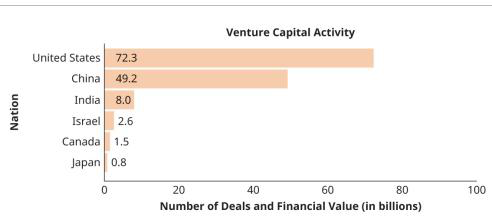

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


TITLE	Venture Capital Activity 


,Nation,Venture Capital Activity
0,Nation,Venture Capital Activity
1,Japan,0.8
2,Canada,1.5
3,Israel,2.6
4,India,8.0
5,China,49.2
6,United States,72.3


In [6]:
deplot_output=deplot("/kaggle/input/benetech-making-graphs-accessible/train/images/8b6935f7ef04.jpg", model, processor, device)
display_deplot_output(deplot_output)

# Histogram -> Excellent 

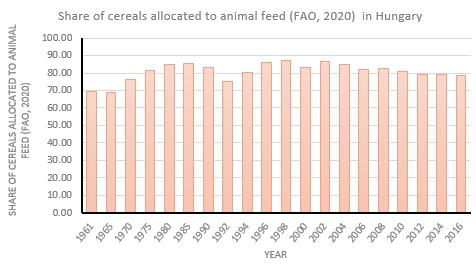

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


TITLE	Share of cereals allocated to animal feed (FAO, 2020) in Hungary


,Year,Share of cereals allocated to animal feed
0,1961,69.70
1,1965,69.41
2,1970,74.82
3,1975,81.05
4,1980,84.12
5,1985,84.44
6,1990,82.90
7,1992,74.50
8,1994,80.30
9,1996,85.20


In [7]:
deplot_output=deplot("/kaggle/input/benetech-making-graphs-accessible/train/images/00cee4e08d80.jpg", model, processor, device)
display_deplot_output(deplot_output)

# Dot -> Needs Needs Tuning?  

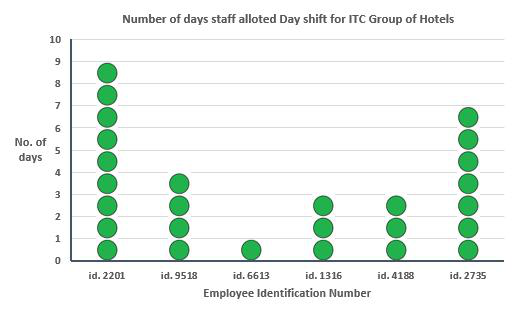

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


TITLE	Number of days staff allotted Day shift for ITC Group of Hotels


,Employee Identification Number,Number of days staff allotted Day shift for ITC Group of Hotels
0,No. of days,No. of days
1,Number of days staff allotted,No. of days
2,Number of days staff allotted,No. of days
3,Number of days,NaN
4,Number of days,NaN
5,Number of days,NaN
6,Number of days,NaN
7,Number of days,NaN
8,Number of days,NaN
9,Number of days,NaN


In [8]:
deplot_output=deplot("/kaggle/input/benetech-making-graphs-accessible/train/images/000917f5d829.jpg", model, processor, device)
display_deplot_output(deplot_output)

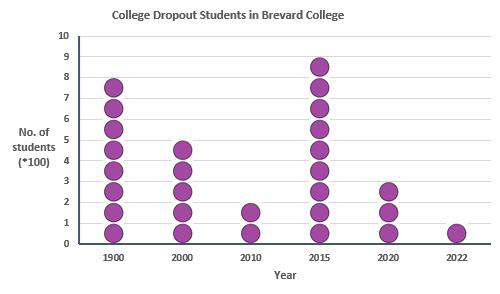

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


TITLE	College Dropout Students in Brevard College


,Year,No. of
0,students,NaN
1,(*100),NaN
2,2000,5.00
3,2010,1.00
4,2015,8.61
5,2020,2.62
6,2022,0.65


In [9]:
deplot_output=deplot("/kaggle/input/benetech-making-graphs-accessible/train/images/000944919c5c.jpg", model, processor, device)
display_deplot_output(deplot_output)

# Line -> Excellent 

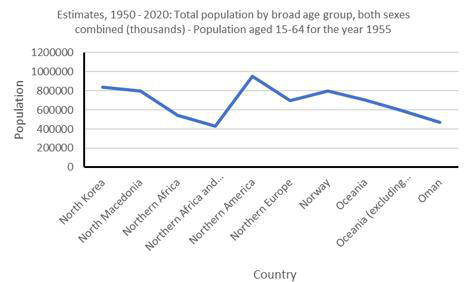

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


TITLE	 


,Country,Population
0,North Korea,825684
1,North Macedonia,803958
2,Northern Africa,55161
3,Northern Africa and...,425467
4,Northern America,949103
5,Northern Europe,890448
6,Norway,793414
7,Oceania,666080
8,Oceania (excluding),492082
9,Oman,453851


In [10]:
deplot_output=deplot("/kaggle/input/benetech-making-graphs-accessible/train/images/0005413054c9.jpg", model, processor, device)
display_deplot_output(deplot_output)

# Scatter -> Needs Tuning?  

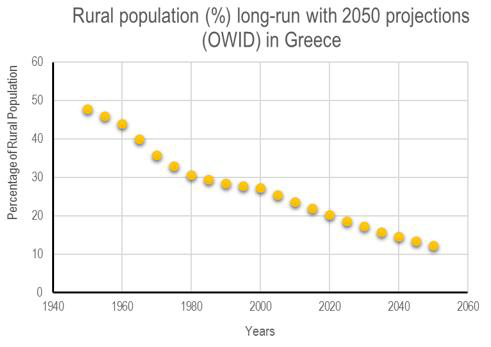

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


TITLE	Rural population (%) long-run with 2050 projections
(OWID) in Greece


,Years,Rural population
0,1940,47.38
1,1960,43.68
2,1980,30.28
3,2000,25.30
4,2020,19.93
5,2040,14.53
6,2060,11.79


In [11]:
deplot_output=deplot("/kaggle/input/benetech-making-graphs-accessible/train/images/0005e64fdc6e.jpg", model, processor, device)
display_deplot_output(deplot_output)